In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [54]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [57]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

inspector = inspect(engine)

conn = engine.connect()

In [58]:
Base = automap_base()
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables


In [59]:
# View all of the classes that automap found
inspector.get_table_names()

['measurement', 'station']

In [60]:
# getting column names using the inspector method

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [61]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [78]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [79]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [80]:
pd.read_sql("SELECT * from measurement limit 5 ", conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [81]:
pd.read_sql("SELECT * from station ", conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [68]:
# Find the most recent date in the data set.

max_date = session.query(func.max(measurement.date)).first()
max_date

('2017-08-23')

In [69]:
pd.read_sql("SELECT max(date) from measurement ", conn)

,max(date)
0,2017-08-23


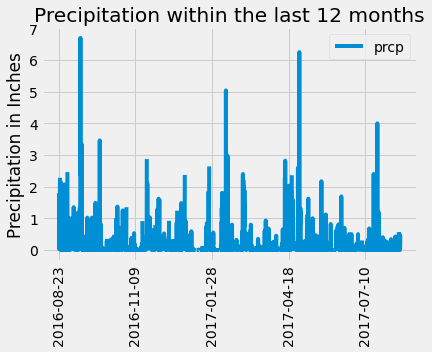

In [70]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_from_max = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_from_max

# Perform a query to retrieve the data and precipitation scores
percipitation_results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_from_max).all()
percipitation_results

# Save the query results as a Pandas DataFrame and set the index to the date column
percipitation_results_df = pd.DataFrame(percipitation_results)
percipitation_results_df

# Sort the dataframe by date
percipitation_results_df = percipitation_results_df.sort_values('date')
percipitation_results_df

# Use Pandas Plotting with Matplotlib to plot the data
percipitation_results_df.plot(x = 'date', y ='prcp', rot = 90)
plt.title('Precipitation within the last 12 months')
plt.xlabel('')
plt.ylabel('Precipitation in Inches')
plt.show()

In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_summ_stats = percipitation_results_df.describe()
precipitation_summ_stats

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number of stations in the dataset

station_count = session.query(measurement).group_by(measurement.station).count()
print(station_count)

9


In [73]:
pd.read_sql("SELECT count(*) from station ", conn)

,count(*)
0,9


In [74]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

# engine.execute('SELECT station FROM station').fetchall()

# USC00519397_count = session.query(measurement).filter_by(station='USC00519397').count()
# USC00513117_count = session.query(measurement).filter_by(station='USC00513117').count()
# USC00514830_count = session.query(measurement).filter_by(station='USC00514830').count()
# USC00517948_count = session.query(measurement).filter_by(station='USC00517948').count()
# USC00518838_count = session.query(measurement).filter_by(station='USC00518838').count()
# USC00519523_count = session.query(measurement).filter_by(station='USC00519523').count()
# USC00519281_count = session.query(measurement).filter_by(station='USC00519281').count()
# USC00511918_count = session.query(measurement).filter_by(station='USC00511918').count()
# USC00516128_count = session.query(measurement).filter_by(station='USC00516128').count()

# print (USC00517948_count)

groupby_station_count = session.query(measurement.station, func.count(measurement.station))\
.group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

groupby_station_count


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active = pd.read_sql("SELECT * from measurement where station == 'USC00519281'", conn)
most_active

avg_temp = most_active['tobs'].mean()
high_temp = most_active['tobs'].max()
low_temp = most_active['tobs'].min()

most_active_summary =pd.DataFrame({
    'USC00519281': [avg_temp, high_temp, low_temp],
}, columns=['USC00519281'])
most_active_summary.index = ['Avg. Temp', 'Highest Temp', 'Lowest Temp']

most_active_summary = most_active_summary.style.format({
    'USC00519281':'{0:,.2f}'})
most_active_summary

,USC00519281
Avg. Temp,71.66
Highest Temp,85.00
Lowest Temp,54.00


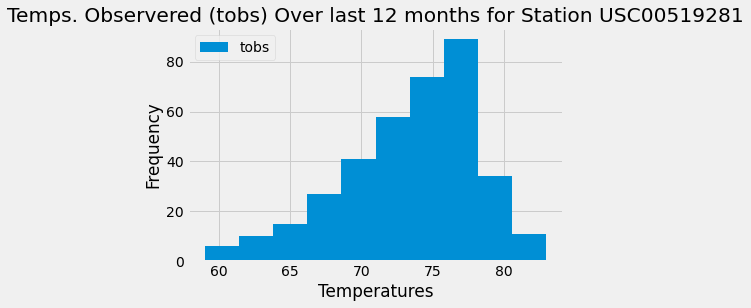

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

USC00519281_hist = pd.read_sql("SELECT tobs from measurement where station == 'USC00519281'", conn)
USC00519281_hist_365 = USC00519281_hist.tail(365)
USC00519281_hist_365.plot.hist()
plt.title('Temps. Observered (tobs) Over last 12 months for Station USC00519281')
plt.xlabel('Temperatures')
plt.show()

# Close session

In [25]:
# Close Session
session.close()